In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
dataset=pd.read_excel('/content/drive/MyDrive/vid_game_sale.xlsx')

In [215]:
dataset

,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,1904,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1905,SingStar Abba,PS3,2008.0,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,1906,FIFA Soccer World Championship,PS2,2000.0,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00


In [216]:
dataset.isnull().sum()

,0
Rank,0
Game Title,0
Platform,0
Year,29
Genre,0
Publisher,2
North America,0
Europe,0
Japan,0
Rest of World,0


In [217]:
from sklearn.impute import SimpleImputer

In [218]:
num_imputer=SimpleImputer(strategy='mean')
cat_imputer=SimpleImputer(strategy='most_frequent')

In [219]:
dataset['Year']=num_imputer.fit_transform(dataset[['Year']])

In [220]:
dataset['Publisher']=cat_imputer.fit_transform(dataset['Publisher'].values.reshape(-1,1))[:,0]

In [221]:
dataset.isnull().sum()

,0
Rank,0
Game Title,0
Platform,0
Year,0
Genre,0
Publisher,0
North America,0
Europe,0
Japan,0
Rest of World,0


In [222]:
dataset['Year']=dataset['Year'].astype(int)

In [223]:
dataset['Year'].dtypes

dtype('int64')

In [224]:
dataset['Rank'].value_counts()

,count
Rank,
1,1
1268,1
1280,1
1279,1
1278,1
...,...
632,1
631,1
630,1


Text(0.5, 0.98, 'Hist of North America')

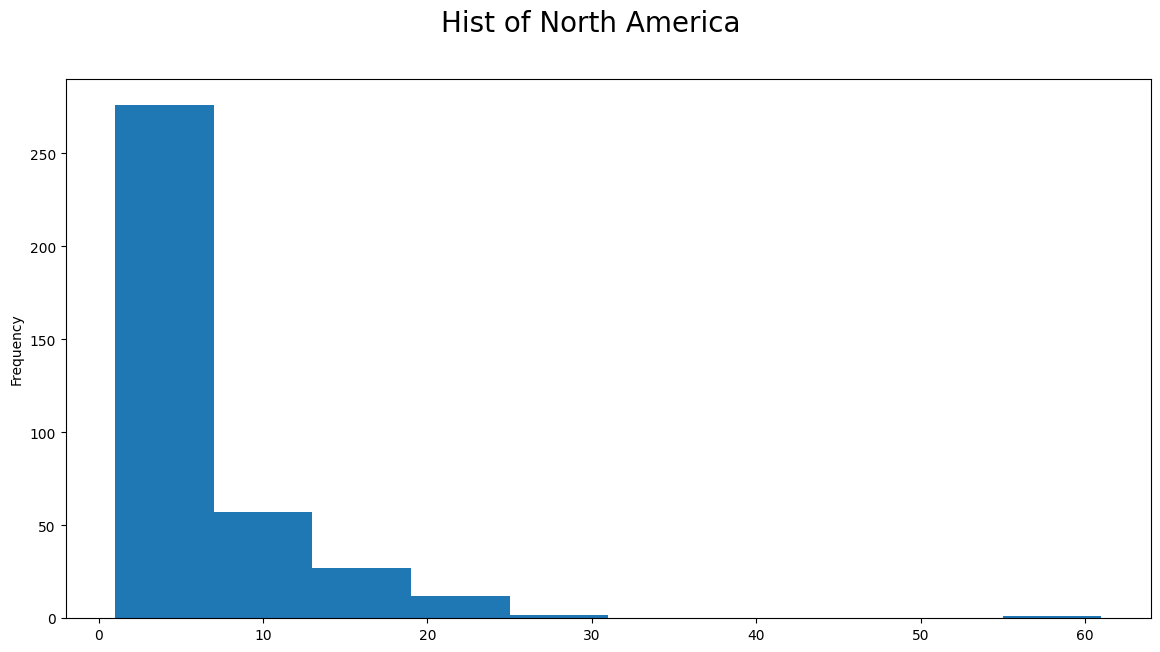

In [225]:
dataset['North America'].value_counts().plot(kind='hist',figsize=(14,7))
plt.suptitle('Hist of North America',fontsize=20)

Text(0.5, 0.98, 'Countplot of Europe')

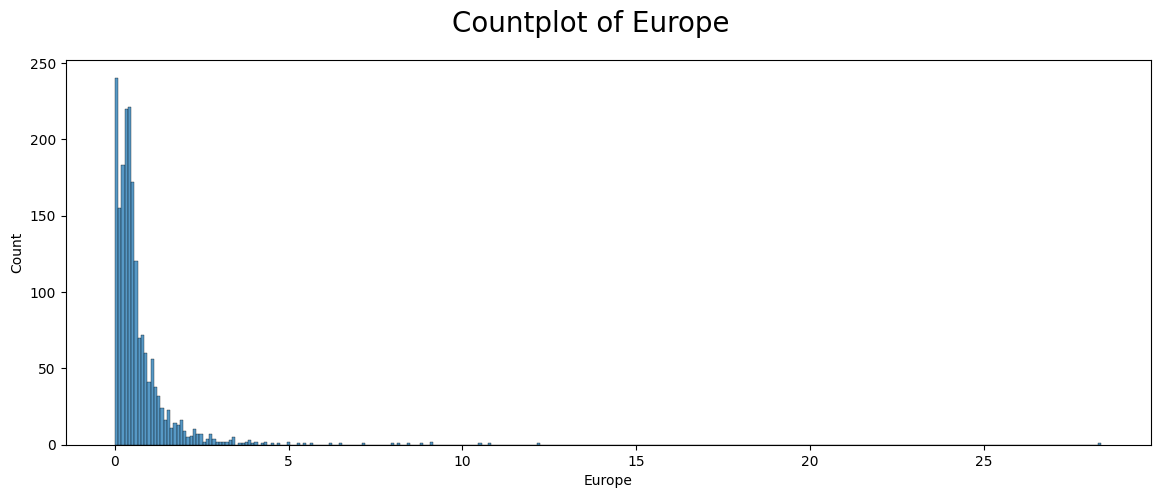

In [226]:
plt.figure(figsize=(14,5))
sns.histplot(dataset,x='Europe')
plt.suptitle('Countplot of Europe',fontsize=20)

Text(0.5, 0.98, 'lineplot of Rank Vs Review')

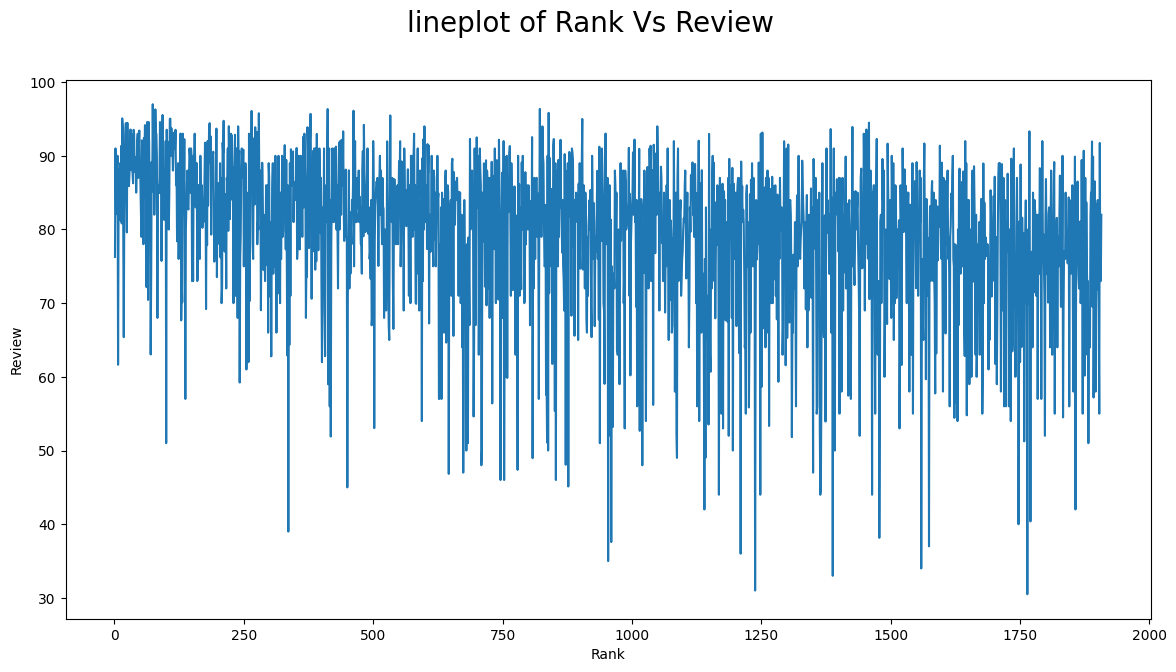

In [227]:
plt.figure(figsize=(14,7))
sns.lineplot(dataset,x='Rank',y='Review')
plt.suptitle('lineplot of Rank Vs Review',fontsize=20)

Text(0.5, 0.98, 'Areaplot of Rank Vs North America')

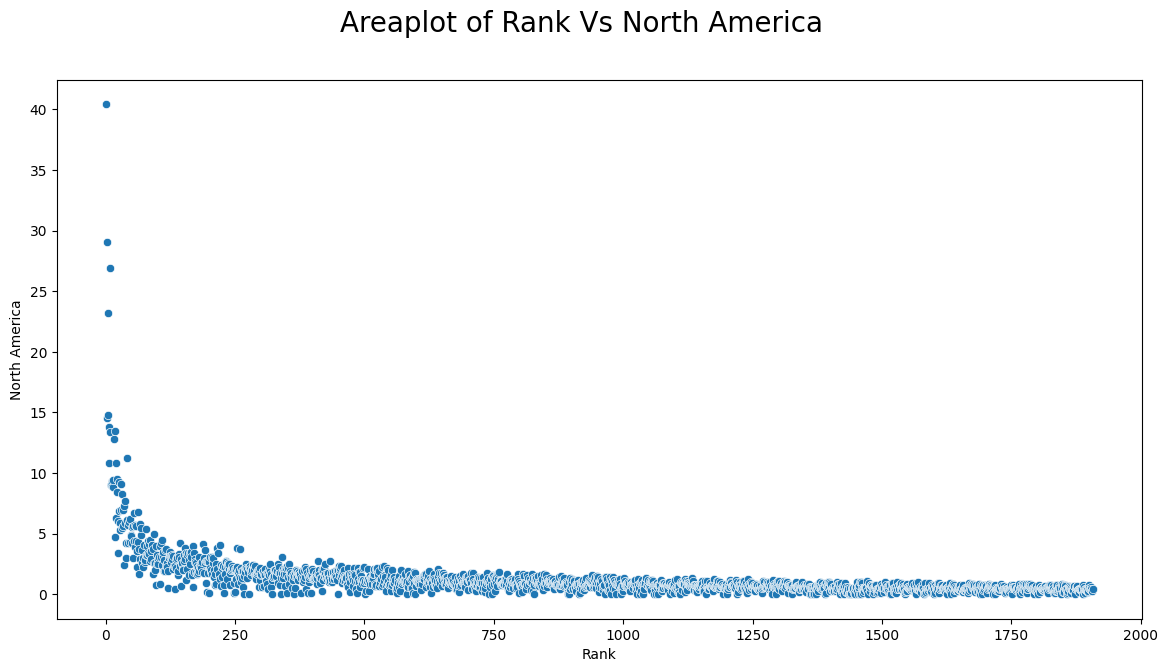

In [228]:
plt.figure(figsize=(14,7))
sns.scatterplot(dataset,x='Rank',y='North America')
plt.suptitle('Areaplot of Rank Vs North America',fontsize=20)

In [229]:
num_data=['Rank','Year','North America','Europe','Japan','Rest of World','Global','Review']

Text(0.5, 0.98, 'Correlation of the dataset')

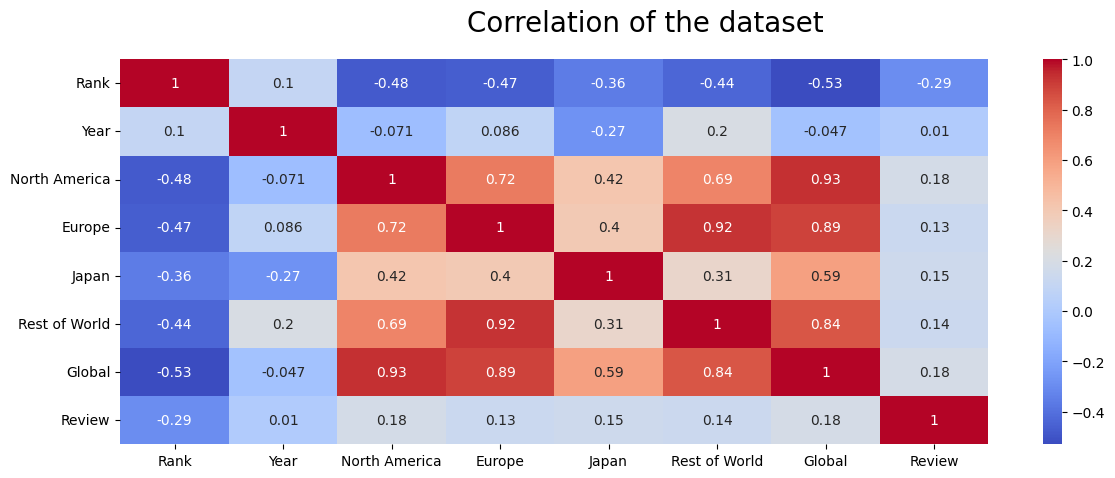

In [230]:
plt.figure(figsize=(14,5))
sns.heatmap(dataset[num_data].corr(),annot=True,cmap='coolwarm')
plt.suptitle('Correlation of the dataset',fontsize=20)

In [231]:
import plotly.express as px


In [232]:
# Group by Genre and sum up the Global sales
genre_sales = dataset.groupby('Genre')['Global'].sum().reset_index()
genre_sales


,Genre,Global
0,Action,637.27
1,Adventure,239.45
2,Fighting,249.00
3,Misc,426.12
4,Platform,595.24
5,Puzzle,108.65
6,Racing,451.80
7,Role-Playing,496.20
8,Shooter,557.20
9,Simulation,205.14


In [233]:
# Create a bar chart showing global sales by Genre
fig = px.bar(genre_sales, x='Genre', y='Global', title='Global Sales by Genre')
fig.show()

In [234]:
# Group by Platform and calculate the average Review score
platform_reviews = dataset.groupby('Platform')['Review'].mean().reset_index()
platform_reviews


,Platform,Review
0,3DS,81.246000
1,DC,91.545000
2,DS,73.234430
3,GB,78.637917
4,GBA,75.041200
5,GC,80.737818
6,GEN,86.090909
7,N64,81.261404
8,NES,76.245000
9,PC,84.619437


In [235]:
# Create a bar chart showing average review scores by Platform
fig = px.bar(platform_reviews, x='Platform', y='Review', title='Average Review Score by Platform')
fig.show()

In [236]:
# Group by Year and sum sales across regions
yearly_region_sales = dataset.groupby('Year')[['North America', 'Europe', 'Japan', 'Rest of World']].sum().reset_index()
yearly_region_sales

,Year,North America,Europe,Japan,Rest of World
0,1983,2.32,0.46,8.10,0.08
1,1984,32.15,1.85,11.00,0.65
2,1985,32.09,4.45,12.13,0.90
3,1986,10.59,2.60,13.58,0.40
4,1987,5.28,1.18,10.42,0.18
5,1988,21.49,6.26,13.55,0.90
6,1989,39.31,7.33,14.85,1.37
7,1990,23.59,7.44,14.04,1.39
8,1991,10.87,3.67,6.25,0.62
9,1992,36.22,12.76,20.65,1.84


In [237]:
# Create a line plot for regional sales by year
fig = px.line(yearly_region_sales, x='Year', y=yearly_region_sales.columns[1:],
              title='Regional Sales by Year')
fig.show()

In [238]:
# Aggregate sales by region
region_sales = dataset[['North America', 'Europe', 'Japan', 'Rest of World']].sum().reset_index()

# Rename columns for readability
region_sales.columns = ['Region', 'Sales']

# For visualization, we will map regions to countries (ISO 3166-1 alpha-3 codes)
region_codes = {
    'North America': 'USA',  # Example: You could aggregate USA, Canada, Mexico into this category
    'Europe': 'EUU',  # Placeholder for Europe; you can split or map specific countries if needed
    'Japan': 'JPN',   # Japan code
    'Rest of World': 'ROW'  # You could specify additional regions or leave this as "Rest of World"
}

# Map the region names to their respective country codes
region_sales['Country_Code'] = region_sales['Region'].map(region_codes)

# Create the choropleth map
fig = px.choropleth(region_sales,
                    locations='Country_Code',
                    color='Sales',
                    hover_name='Region',
                    color_continuous_scale='Viridis',
                    title="Regional Sales in Video Games")

# Show the map
fig.show()

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, SpectralClustering

In [240]:
lab=LabelEncoder()

In [241]:
dataset['Game Title']=lab.fit_transform(dataset['Game Title'])
dataset['Platform']=lab.fit_transform(dataset['Platform'])
dataset['Genre']=lab.fit_transform(dataset['Genre'])
dataset['Publisher']=lab.fit_transform(dataset['Publisher'])

In [242]:
dataset

,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,1,1456,18,2006,10,53,40.43,28.39,3.77,8.54,81.12,76.28
1,2,1193,8,1985,4,53,29.08,3.58,6.81,0.77,40.24,91.00
2,3,630,18,2008,6,53,14.50,12.22,3.63,3.21,33.55,82.07
3,4,1457,18,2009,10,53,14.82,10.51,3.18,3.01,31.52,82.65
4,5,1254,3,1989,5,53,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1903,574,4,2004,0,22,0.60,0.22,0.00,0.01,0.83,55.00
1903,1904,1483,18,2010,7,53,0.39,0.22,0.16,0.07,0.83,91.74
1904,1905,1066,12,2008,3,69,0.25,0.44,0.00,0.14,0.83,73.00
1905,1906,311,11,2000,10,24,0.27,0.21,0.28,0.07,0.83,73.00


In [243]:
model=KMeans()

In [244]:
model.fit(dataset)

KMeans()

In [245]:
model.labels_

array([2, 2, 0, ..., 6, 3, 6], dtype=int32)

In [246]:
model.cluster_centers_

array([[4.07330396e+02, 7.47872247e+02, 1.08678414e+01, 2.00431718e+03,
        5.40528634e+00, 4.55770925e+01, 2.00171806e+00, 1.11299559e+00,
        6.50352423e-01, 3.38193833e-01, 4.10303965e+00, 8.22867401e+01],
       [1.57572245e+03, 7.20493878e+02, 1.11469388e+01, 2.00426939e+03,
        6.22448980e+00, 4.62530612e+01, 5.50408163e-01, 2.70612245e-01,
        1.15755102e-01, 8.43265306e-02, 1.02097959e+00, 7.74720816e+01],
       [3.04449495e+02, 1.27959596e+03, 1.04141414e+01, 2.00143434e+03,
        4.67171717e+00, 4.76565657e+01, 2.81525253e+00, 1.49070707e+00,
        6.77323232e-01, 3.69696970e-01, 5.35252525e+00, 8.42700505e+01],
       [1.57300000e+03, 2.02625000e+02, 1.19100000e+01, 2.00457500e+03,
        5.28000000e+00, 3.91700000e+01, 4.68750000e-01, 3.09750000e-01,
        1.48500000e-01, 9.60000000e-02, 1.02280000e+00, 7.63982500e+01],
       [9.61685121e+02, 3.98806228e+02, 1.13667820e+01, 2.00384775e+03,
        5.21107266e+00, 4.32387543e+01, 8.13702422e-01, 3.98

In [247]:
model_1=MiniBatchKMeans()

In [248]:
model_1.fit(dataset)

MiniBatchKMeans()

In [249]:
model_1.labels_

array([4, 4, 6, ..., 1, 3, 1], dtype=int32)

In [250]:
model_1.cluster_centers_

array([[6.98309746e+02, 5.76804628e+02, 1.20391633e+01, 2.00372719e+03,
        5.82020472e+00, 4.47774811e+01, 1.13249221e+00, 4.56243881e-01,
        2.49034268e-01, 1.63440142e-01, 2.00097908e+00, 8.03641255e+01],
       [1.63212341e+03, 1.00531562e+03, 1.18933382e+01, 2.00439425e+03,
        5.90862759e+00, 4.65682563e+01, 5.01314161e-01, 2.82311613e-01,
        1.15405897e-01, 8.61922097e-02, 9.84932654e-01, 7.60979833e+01],
       [8.10349280e+02, 1.09380610e+03, 1.13480102e+01, 2.00270576e+03,
        5.29127858e+00, 4.61215072e+01, 9.11511431e-01, 5.17794242e-01,
        2.04496190e-01, 1.40025402e-01, 1.77401778e+00, 7.85695004e+01],
       [1.67749365e+03, 3.08050839e+02, 1.14311134e+01, 2.00501932e+03,
        5.66853076e+00, 4.18434164e+01, 4.79517031e-01, 2.81453991e-01,
        1.08906965e-01, 8.70411795e-02, 9.56629385e-01, 7.61992018e+01],
       [2.70213468e+02, 1.20417430e+03, 9.70422535e+00, 2.00226452e+03,
        4.60607394e+00, 4.98345070e+01, 3.02434419e+00, 1.73

In [251]:
model_2=AgglomerativeClustering()

In [252]:
model_2.fit(dataset)

AgglomerativeClustering()

In [253]:
model_2.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [254]:
dataset['kmeans']=model.labels_
dataset['minibatchkmeans']=model_1.labels_
dataset['agglo']=model_2.labels_

In [255]:
dataset

,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review,kmeans,minibatchkmeans,agglo
0,1,1456,18,2006,10,53,40.43,28.39,3.77,8.54,81.12,76.28,2,4,0
1,2,1193,8,1985,4,53,29.08,3.58,6.81,0.77,40.24,91.00,2,4,0
2,3,630,18,2008,6,53,14.50,12.22,3.63,3.21,33.55,82.07,0,6,0
3,4,1457,18,2009,10,53,14.82,10.51,3.18,3.01,31.52,82.65,2,4,0
4,5,1254,3,1989,5,53,23.20,2.26,4.22,0.58,30.26,88.00,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1903,574,4,2004,0,22,0.60,0.22,0.00,0.01,0.83,55.00,1,3,1
1903,1904,1483,18,2010,7,53,0.39,0.22,0.16,0.07,0.83,91.74,6,1,1
1904,1905,1066,12,2008,3,69,0.25,0.44,0.00,0.14,0.83,73.00,6,1,1
1905,1906,311,11,2000,10,24,0.27,0.21,0.28,0.07,0.83,73.00,3,3,1


Text(0.5, 0.98, 'Comparing the clustered data with the Global Vs Review data using KMeans')

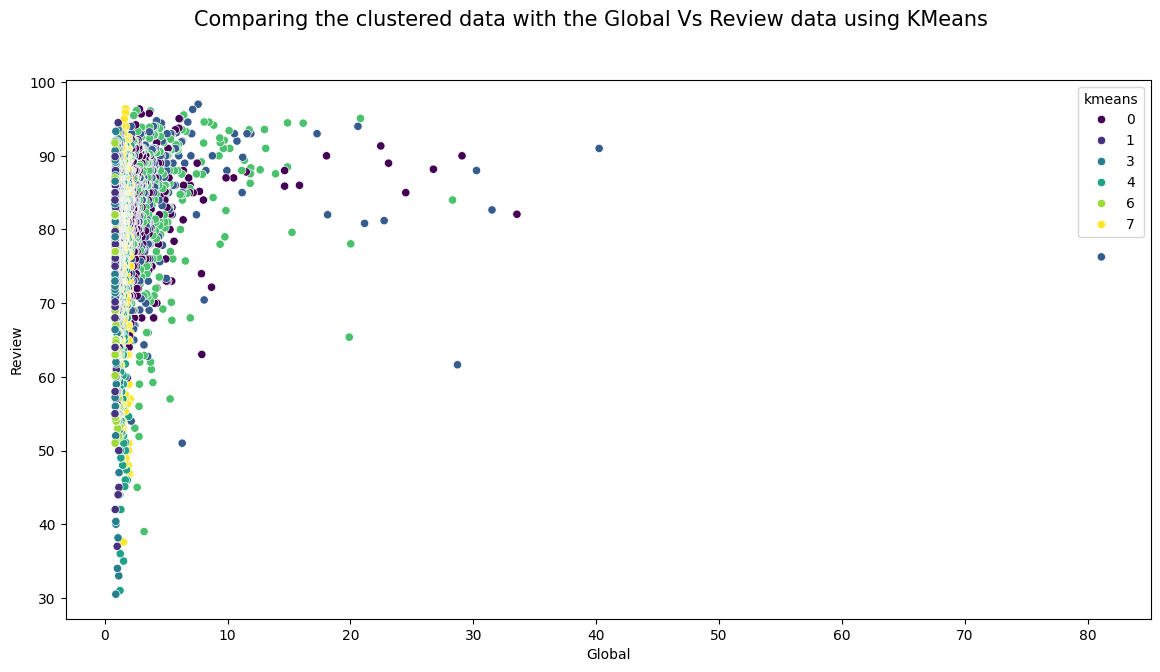

In [256]:
#Comparing the clustered data with the Global Vs Review data's
plt.figure(figsize=(14,7))
sns.scatterplot(data=dataset,x='Global',y='Review',hue='kmeans',palette="viridis")
plt.suptitle('Comparing the clustered data with the Global Vs Review data using KMeans',fontsize=15)

Text(0.5, 0.98, 'Comparing the clustered data with the Global Vs Review data using MiniKBatch')

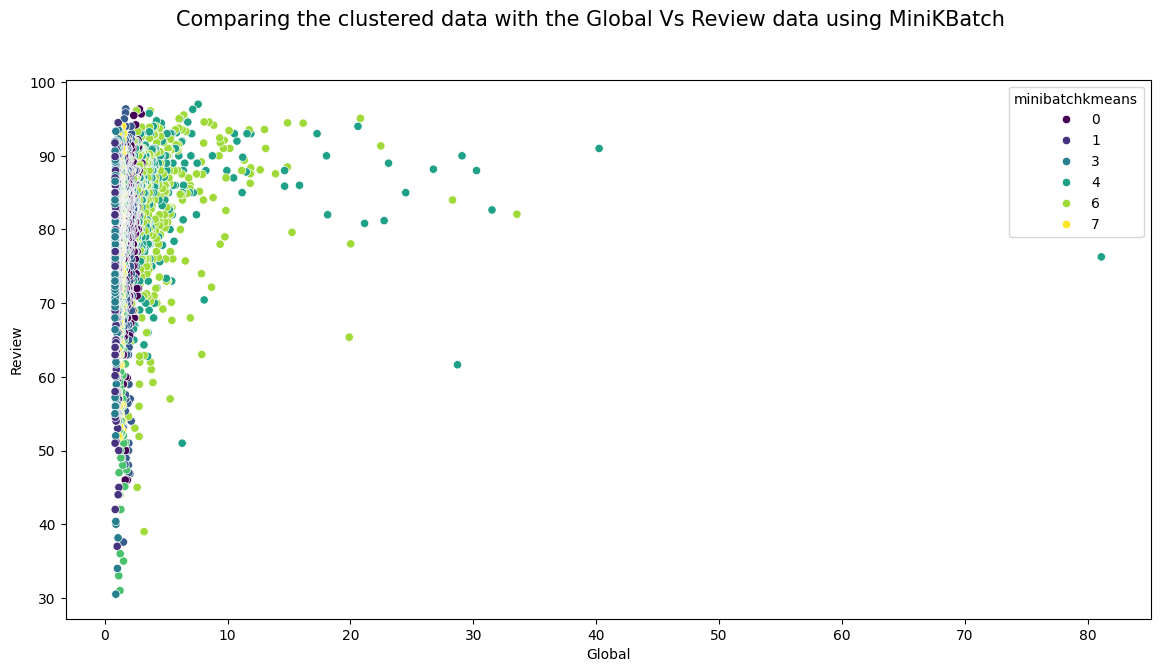

In [257]:
#Comparing the clustered data with the Global Vs Review data's
plt.figure(figsize=(14,7))
sns.scatterplot(data=dataset,x='Global',y='Review',hue='minibatchkmeans',palette="viridis")
plt.suptitle('Comparing the clustered data with the Global Vs Review data using MiniKBatch',fontsize=15)

Text(0.5, 0.98, 'Comparing the clustered data with the Global Vs Review data using Aggloramative_Clustering')

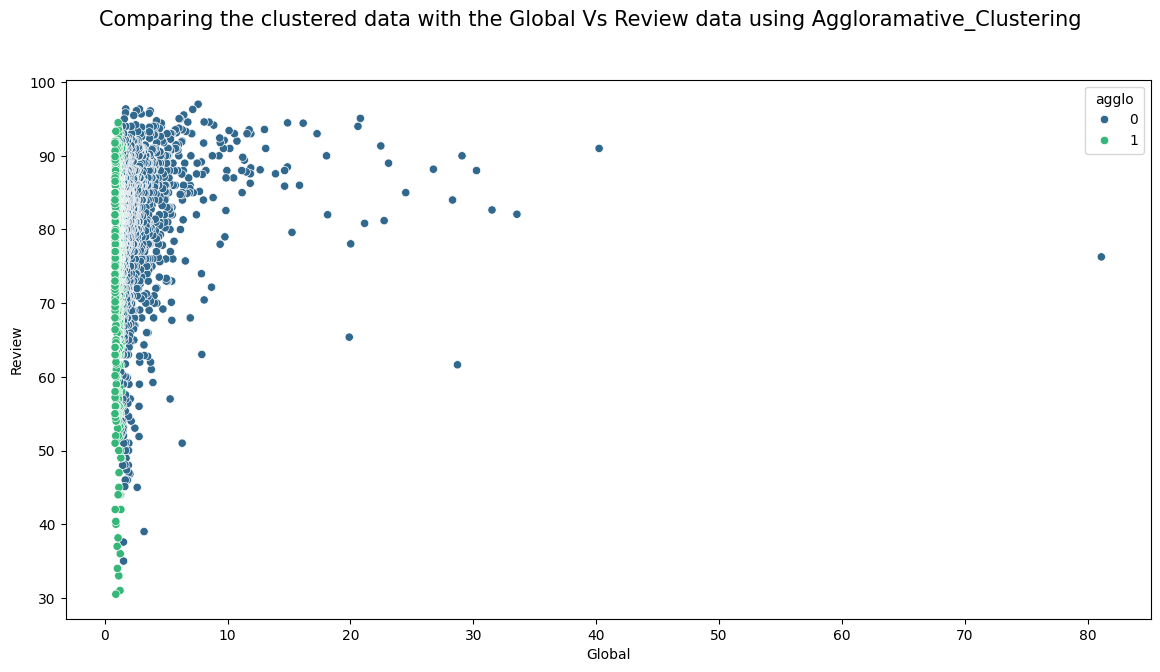

In [258]:
#Comparing the clustered data with the Global Vs Review data's
plt.figure(figsize=(14,7))
sns.scatterplot(data=dataset,x='Global',y='Review',hue='agglo',palette="viridis")
plt.suptitle('Comparing the clustered data with the Global Vs Review data using Aggloramative_Clustering',fontsize=15)